In [ ]:
# Data analysis of the yahoo data

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

Read in the data

In [18]:
df_esg = pd.read_excel('YAHOO_PRICE_ESG.xlsx', sheet_name='ESG')
df_esg_info = pd.read_excel('YAHOO_PRICE_ESG.xlsx', sheet_name='esg_info')
df_price = pd.read_excel('YAHOO_PRICE_ESG.xlsx', sheet_name='PRICE')
df_asset_profiles= pd.read_excel('YAHOO_PRICE_ESG.xlsx', sheet_name='asset_profiles')
df_company_officers = pd.read_excel('YAHOO_PRICE_ESG.xlsx', sheet_name='company_officers')

# Merge the price, and asset profied
df_price = df_price.merge(df_asset_profiles, on = ['ticker'])
df_esg = df_esg.merge(df_asset_profiles, on = ['ticker'])

In [19]:
df_price.columns

Index(['Unnamed: 0_x', 'timestamp', 'close', 'volume', 'open', 'low', 'high',
       'adjclose', 'ticker', 'Unnamed: 0_y', 'address', 'city', 'state', 'zip',
       'country', 'industry', 'sector', 'boardRisk', 'compensationRisk',
       'shareHolderRightsRisk', 'overallRisk'],
      dtype='object')

In [20]:
np.unique(df_price['sector'])

array(['Basic Materials', 'Communication Services', 'Consumer Cyclical',
       'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare',
       'Industrials', 'Real Estate', 'Technology', 'Utilities'],
      dtype=object)

In [60]:
def AttributeCliqueGraph(df, attr, node_attr, ticker_name = 'ticker', timestamp_name = 'timestamp'):
    """
    Function that takes each unique attribute and creates a clique

    :param df: The data frame
    :param attr: The attribute that determines cliques
    :param node_attr: name of the node attributes/lables

    :returns dictionary: key=attr name, value: list networks graph clique
    """

    unique_attrs = np.unique(df[attr])

    graphs = {}

    for i, unique_attr in enumerate(unique_attrs):
        print(f'{unique_attr}, {i+1} of {len(unique_attrs)}')

        tmp_data = df.loc[df[attr] == unique_attr]

        unique_tickers = np.unique(tmp_data[ticker_name])

        graphs[unique_attr] = []

        # for this ticker
        for unique_ticker in unique_tickers:

            tmp_data_ticker = tmp_data.loc[tmp_data[ticker_name] == unique_ticker]
            tmp_data_ticker.sort_values(by = [timestamp_name])

            # data is ordered
            for row_id in range(tmp_data_ticker.shape[0]):

                if len(graphs[unique_attr]) > row_id:
                    # we have already created a graph for this timestamp
                    graphs[unique_attr][row_id].add_nodes_from([(unique_ticker, {'attribute': tmp_data_ticker[node_attr].iloc[row_id], 'timestamp':tmp_data_ticker[timestamp_name].iloc[row_id]})])
                else: 
                    # we need to create a graph for this timestamp
                    graphs[unique_attr].append(nx.Graph())
                    graphs[unique_attr][row_id].add_nodes_from([(unique_ticker, {'attribute': tmp_data_ticker[node_attr].iloc[row_id], 'timestamp':tmp_data_ticker[timestamp_name].iloc[row_id]})])


        # We have added all nodes, now we have to connect them
        for g in graphs[unique_attr]:
            from itertools import product
            g.add_edges_from((a,b) for a,b in product(list(g.nodes()), list(g.nodes())) if a != b)
            


    return graphs
                
    


    

In [61]:
graphs = AttributeCliqueGraph(df_price, 'sector','open')

Basic Materials, 0 of 11
Communication Services, 1 of 11
Consumer Cyclical, 2 of 11
Consumer Defensive, 3 of 11
Energy, 4 of 11
Financial Services, 5 of 11


Let's check the time (looks right if we run)

In [57]:
for i in graphs['Energy']:
    print(list(i.nodes('timestamp'))[0][1])

2004-07-19 04:00:00
2004-07-26 04:00:00
2004-08-02 04:00:00
2004-08-09 04:00:00
2004-08-16 04:00:00
2004-08-23 04:00:00
2004-08-30 04:00:00
2004-09-06 04:00:00
2004-09-13 04:00:00
2004-09-20 04:00:00
2004-09-27 04:00:00
2004-10-04 04:00:00
2004-10-11 04:00:00
2004-10-18 04:00:00
2004-10-25 04:00:00
2004-11-01 05:00:00
2004-11-08 05:00:00
2004-11-15 05:00:00
2004-11-22 05:00:00
2004-11-29 05:00:00
2004-12-06 05:00:00
2004-12-13 05:00:00
2004-12-20 05:00:00
2004-12-27 05:00:00
2005-01-03 05:00:00
2005-01-10 05:00:00
2005-01-17 05:00:00
2005-01-24 05:00:00
2005-01-31 05:00:00
2005-02-07 05:00:00
2005-02-14 05:00:00
2005-02-21 05:00:00
2005-02-28 05:00:00
2005-03-07 05:00:00
2005-03-14 05:00:00
2005-03-21 05:00:00
2005-03-28 05:00:00
2005-04-04 04:00:00
2005-04-11 04:00:00
2005-04-18 04:00:00
2005-04-25 04:00:00
2005-05-02 04:00:00
2005-05-09 04:00:00
2005-05-16 04:00:00
2005-05-23 04:00:00
2005-05-30 04:00:00
2005-06-06 04:00:00
2005-06-13 04:00:00
2005-06-20 04:00:00
2005-06-27 04:00:00


# We can draw the cliques

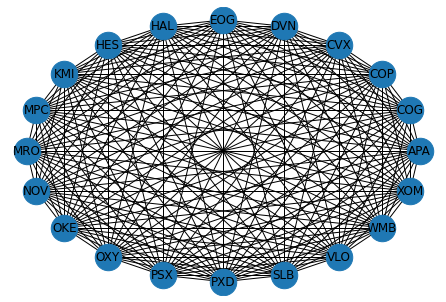

In [52]:
G = graphs['Energy'][0]
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=700)